# Implementing L1 and L2 regularization using Sklearn

Prerequisites: L2 and L1 regularization

This article aims to implement the L2 and L1 regularization for Linear regression using the Ridge and Lasso modules of the Sklearn library of Python.

Dataset – House prices dataset .

In [29]:
!wget https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


Step 1: Importing the required libraries

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 
from sklearn import preprocessing

Step 2: Loading and cleaning the Data

In [31]:
# Changing the working location to the location of the data 

# Loading the data into a Pandas DataFrame 
data = pd.read_csv('kc_house_data.csv') 

In [32]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [33]:
data.shape

(21613, 21)

In [34]:
data.dropna(how='any',inplace=True)

In [35]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          1000 non-null   float64
 1   bedrooms       1000 non-null   int64  
 2   bathrooms      1000 non-null   float64
 3   sqft_living    1000 non-null   int64  
 4   sqft_lot       1000 non-null   int64  
 5   floors         1000 non-null   float64
 6   waterfront     1000 non-null   int64  
 7   view           1000 non-null   int64  
 8   condition      1000 non-null   int64  
 9   grade          1000 non-null   int64  
 10  sqft_above     998 non-null    float64
 11  sqft_basement  1000 non-null   int64  
 12  yr_built       1000 non-null   int64  
 13  yr_renovated   1000 non-null   int64  
 14  lat            1000 non-null   float64
 15  long           1000 non-null   float64
 16  sqft_living15  1000 non-null   int64  
 17  sqft_lot15     1000 non-null   int64  
dtypes: float6

In [36]:
# Dropping the numerically non-sensical variables 
dropColumns = ['id', 'date', 'zipcode'] 
data = data.drop(dropColumns, axis = 1) 
#to visualize overfitting selecting only 1000 datapoints
data = data[0:1000]

# Separating the dependent and independent variables 
y = data['price'] 
X = data.drop('price', axis = 1) 

x = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

# Dividing the data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 17), (250, 17), (750,), (250,))

In [38]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.478429,0.409250,0.293396,0.044650,0.178800,0.008000,0.059250,0.61575,0.450750,0.240820,0.145225,0.600374,0.040590,0.619593,0.361739,0.294279,0.055021
std,0.121716,0.144145,0.155833,0.092020,0.207059,0.089129,0.191281,0.17232,0.145027,0.138855,0.217873,0.245277,0.196414,0.236136,0.178599,0.170607,0.107555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.428571,0.300000,0.180580,0.015186,0.000000,0.000000,0.000000,0.50000,0.375000,0.142355,0.000000,0.452174,0.000000,0.442051,0.214789,0.167939,0.020336
50%,0.428571,0.400000,0.267135,0.023500,0.000000,0.000000,0.000000,0.50000,0.375000,0.203866,0.000000,0.643478,0.000000,0.642976,0.348271,0.259542,0.031439
75%,0.571429,0.500000,0.367311,0.034444,0.400000,0.000000,0.000000,0.75000,0.500000,0.307996,0.281553,0.800000,0.000000,0.826362,0.476312,0.389313,0.041760
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Step 3: Building and evaluating the different models

a) Linear Regression:

In [40]:
# Bulding and fitting the Linear Regression model 
linearModel = LinearRegression() 
linearModel.fit(X_train, y_train) 

# Evaluating the Linear Regression model 
print(linearModel.score(X_train, y_train)) 
print(linearModel.score(X_test, y_test)) 

0.7327195854689772
0.6815379304584659


b) Ridge(L2) Regression:

In [41]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 

# List to maintain the different values of alpha 
alpha = [] 
# Loop to compute the different values of cross-validation scores 
for i in range(-3, 3): 
	ridgeModel = Ridge(alpha = 10**(-i)) 
	ridgeModel.fit(X_train, y_train) 
	scores = cross_val_score(ridgeModel, X, y, cv = 10) 
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_ridge.append(avg_cross_val_score) 
	alpha.append(10**(-i)) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 


1000 : 10.530310824679164
100 : 49.53533371147057
10 : 68.6449363912645
1 : 69.88971834441283
0.1 : 69.72304390317787
0.01 : 69.68705538939537


In [42]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 

# List to maintain the different values of alpha 
alpha = [] 

# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
	ridgeModel = Ridge(alpha = i * 0.25) 
	ridgeModel.fit(X_train, y_train) 
	scores = cross_val_score(ridgeModel, X, y, cv = 10) 
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_ridge.append(avg_cross_val_score) 
	alpha.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 


0.25 : 69.77193480374088
0.5 : 69.83025570462857
0.75 : 69.86760631725909
1.0 : 69.88971834441283
1.25 : 69.90027571457126
1.5 : 69.90181873690422
1.75 : 69.89618328721878
2.0 : 69.8847402737714


In [43]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 1.5) 
ridgeModelChosen.fit(X_train, y_train) 

# Evaluating the Ridge Regression model 

print(ridgeModelChosen.score(X_train, y_train)) 
print(ridgeModelChosen.score(X_test, y_test)) 

0.7302109203268572
0.6934363310436391


c) Lasso(L1) Regression:

In [44]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 

# List to maintain the different values of Lambda 
Lambda = [] 

# Loop to compute the cross-validation scores 
for i in range(-3, 3): 
	lassoModel = Lasso(alpha = 10**(-i), tol = 0.0925) 
	lassoModel.fit(X_train, y_train) 
	scores = cross_val_score(lassoModel, X, y, cv = 10) 
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_lasso.append(avg_cross_val_score) 
	Lambda.append(10**(-i)) 

# Loop to print the different values of cross-validation scores 
for i in range(-3,3): 
	print(str(10**(-i))+' : '+str(cross_val_scores_lasso[i])) 

1000 : 69.6842572268753
100 : 69.68287154865713
10 : 69.68271043744163
1 : 69.3472572026329
0.1 : 69.70275170393778
0.01 : 69.69977475312015


In [45]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 

# List to maintain the different values of Lambda 
Lambda = [] 

# Loop to compute the cross-validation scores 
for i in range(1, 9): 
	lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
	lassoModel.fit(X_train, y_train) 
	scores = cross_val_score(lassoModel, X, y, cv = 10) 
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_lasso.append(avg_cross_val_score) 
	Lambda.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(i * 0.25)+' : '+str(cross_val_scores_lasso[i])) 

0.0 : 69.68304852257374
0.25 : 69.68335760104083
0.5 : 69.68377319282109
0.75 : 69.6842572268753
1.0 : 69.68438170535563
1.25 : 69.68479628597876
1.5 : 69.68515395918115
1.75 : 69.6854524902443


In [46]:
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 10, tol = 0.0925) 
lassoModelChosen.fit(X_train, y_train) 
# Evaluating the Lasso Regression model 
print(lassoModelChosen.score(X_train, y_train)) 
print(lassoModelChosen.score(X_test, y_test)) 


0.7330001763129848
0.6858225618952174


In [47]:
linearModel.coef_

array([-3.31511020e+04,  1.21598764e+05, -1.47164090e+19,  3.00781642e+05,
        7.55344688e+04,  7.42579662e+05,  2.21261878e+05,  4.91337171e+04,
        6.31310574e+05,  1.47164090e+19,  5.32790905e+18, -3.05129989e+05,
        6.48589952e+04,  3.15300086e+05,  1.75006145e+02,  2.15973459e+05,
       -2.23742954e+05])

In [48]:
ridgeModelChosen.coef_

array([ -41086.72092699,  123136.36407886,  392165.93065576,
         93288.93858315,   79786.80296232,  601039.59237362,
        245185.78982201,   52719.68535347,  529465.47582308,
        323262.30678886,  190321.17466141, -278314.72751873,
         71985.83393343,  316124.23805661,  -15644.94318612,
        271920.1417003 ,  -52080.5176572 ])

In [49]:
lassoModelChosen.coef_

array([ -69898.08744278,  108875.91145053, 1454975.58284243,
        285048.53109705,   72688.01830108,  739220.6444117 ,
        220316.99935053,   49012.10470203,  619978.27572416,
       -678830.72912213, -179287.64271411, -307040.43856627,
         64500.03541339,  316653.48629081,    1626.83067033,
        214660.40943495, -204989.61657941])

In [50]:
np.sum(abs(0-linearModel.coef_))

3.4760726984506573e+19

In [51]:
np.sum(abs(0-ridgeModelChosen.coef_)) 

3677529.1840819106

In [52]:
np.sum(abs(0-lassoModelChosen.coef_)) 

5587603.344113704

Step 4: Comparing and Visualizing the results

In [53]:
# Building the two lists for visualization 
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] 
scores = [linearModel.score(X_test, y_test), 
		ridgeModelChosen.score(X_test, y_test), 
		lassoModelChosen.score(X_test, y_test)] 

# Building the dictionary to compare the scores 
mapping = {} 
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test) 
mapping['Ridge Regreesion'] = ridgeModelChosen.score(X_test, y_test) 
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test) 

# Printing the scores for different models 
for key, val in mapping.items(): 
	print(str(key)+' : '+str(val)) 


Linear Regreesion : 0.6815379304584659
Ridge Regreesion : 0.6934363310436391
Lasso Regression : 0.6858225618952174


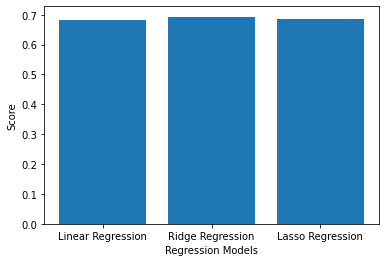

In [54]:
# Plotting the scores 
plt.bar(models, scores) 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show() 
